# <b><u>Problem Statement -  AI-Driven Media Investment Plan</u></b>


# Importing of all the libraries and modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
pwd


'/Users/karanashu/Desktop/workspace'

In [3]:
google_ads= pd.read_csv("dataset1/googleads-performance.csv")
meta_ads= pd.read_csv("dataset1/metaads-performance.csv")
microsoft_ads= pd.read_csv("dataset1/microsoftads-performance.csv")
customer_journey= pd.read_csv("dataset1/website-landings.csv")

# Data Preparation 
Data Cleaning<br>
lets find out wheter the the datasets are conatining null values or not

In [4]:
print(google_ads.isnull().sum())
print(meta_ads.isnull().sum())
print(microsoft_ads.isnull().sum())
print(customer_journey.isnull().sum())

Date             0
Campaign type    0
Impressions      0
Clicks           0
Cost             0
Conversions      0
Revenue          0
dtype: int64
Date           0
Impressions    0
Reach          0
Cost           0
Clicks         0
Conversions    0
Revenue        0
dtype: int64
Date             0
Campaign type    0
Impressions      0
Clicks           0
Cost             0
Conversions      0
Revenue          0
dtype: int64
User Id                      0
Website Landing Time         0
Is Converted                 0
Source                  614849
Channel                      0
Campaign Type           945585
dtype: int64


As the performance data seems having no null values so we can be assured they are clean 

In [5]:
google_ads['Date'] = pd.to_datetime(google_ads['Date'])
meta_ads['Date'] = pd.to_datetime(meta_ads['Date'])
microsoft_ads['Date'] = pd.to_datetime(microsoft_ads['Date'])
customer_journey['Website Landing Time'] = pd.to_datetime(customer_journey['Website Landing Time'])

# Approach and Methodology
<b> A. Data processing</b><br>
<pre>To achieve reliable results, meticulous data processing is essential. The following steps were taken to clean and prepare the data:</pre>
<ul><b>Data Cleaning:</b> We identified and handled missing values, outliers, and inconsistencies in the data. This included imputing missing values, filtering out extreme outliers, and ensuring uniformity across datasets.</ul>
<ul><b>Feature Engineering:</b> Additional features were created to enrich the datasets, including:
<ul>Engagement Scores: Calculated based on user interactions at various touchpoints.</ul>
<ul>Customer Journey Stages: Segmented the customer journey into stages such as awareness, consideration, and conversion.</ul>
</ul>
<ul><b>Normalization:</b> To ensure that the features contributed equally to the model, we normalized numerical variables using standard scaling techniques</ul><br>
<b> A. Algorithm: Budget Allocation Strategy</b><br>
<pre>Analyzing the Performance of Ad Platforms</pre>
<pre>To determine the efficiency and effectiveness of our media investments across different platforms, we performed a detailed analysis of key performance indicators (KPIs). Below are the steps taken and the corresponding metrics calculated:
</pre>
<ol>
    <li>Defining Key Performance Metrics:
        <ul type="button">CPC (Cost Per Click): Measures the cost incurred for each click on an ad</ul>
        <ul type="button">CPM (Cost Per Thousand Impressions): Reflects the cost per 1000 ad impressions.</ul>
        <ul type="button">Conversion Rate: The ratio of conversions (desired actions by users, such as purchases) to the total number of clicks.</ul>
        <ul type="button">ROI (Return on Investment): Calculates the revenue generated for each dollar spent.
</ul>
    </li>
    <li>
        Platform-wise Analysis:
        <ul type="button">We analyzed ad performance across three major platforms: Google, Meta (Facebook), and Microsoft. The performance data for each platform includes Cost, Clicks, Impressions, Conversions, and Revenue.</ul>
        <ul type="button">For each platform, we calculated the CPC, CPM, Conversion Rate, and ROI.</ul>
        <ul type="button">These metrics were then visualized over time to observe trends and patterns.</ul>
    </li>
</ol>


CPC = cost per clicks <br>
CPM= 1000*(cost per impression)<br>
Conversion Rate= Conversion per click<br>
ROI = revenue per cost<br>


Analyzing Google ads:
              CPC         CPM  Conversion Rate         ROI
count  641.000000  714.000000       535.000000  641.000000
mean    10.369537   48.738145         0.032977    2.418299
std     20.834523   80.631284         0.051517    2.776826
min      0.000000    0.000000         0.000000    0.000000
25%      1.220664    4.015969         0.000000    0.000000
50%      1.848057    7.802932         0.022171    1.970618
75%      4.494474   72.045066         0.048694    3.826569
max    128.500000  391.872957         0.800000   22.023622

Analyzing Meta ads:
              CPC         CPM  Conversion Rate         ROI
count  182.000000  182.000000       182.000000  182.000000
mean     0.451144    6.981390         0.074895   28.937375
std      0.137913    1.391778         0.078811   34.584384
min      0.230205    3.762227         0.000000    0.000000
25%      0.340054    6.127672         0.013368    3.953761
50%      0.421528    6.925745         0.035662   19.806298
75%      0.5

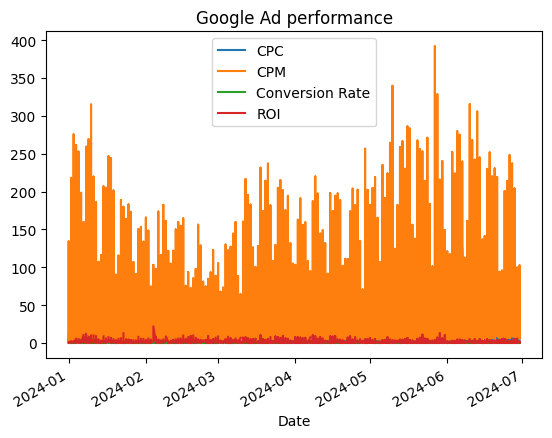

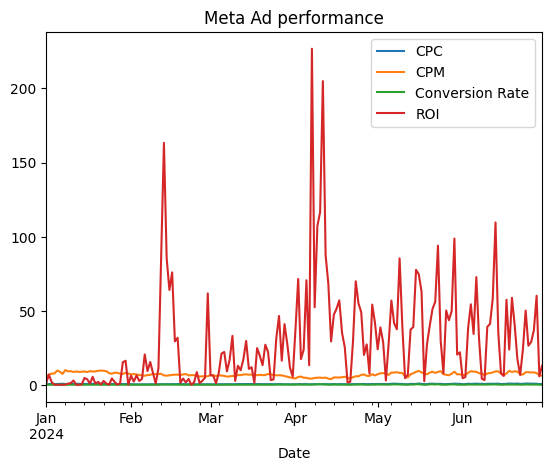

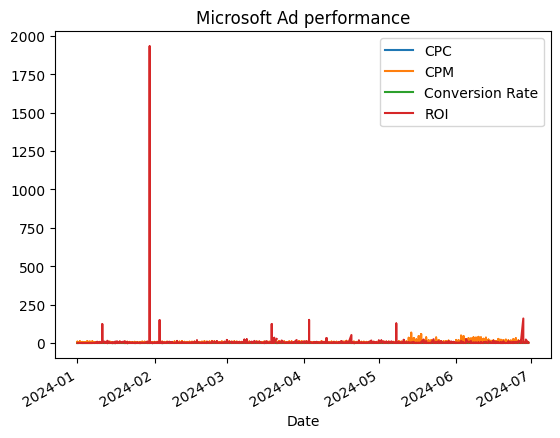

In [6]:
platforms= {'Google': google_ads, 'Meta': meta_ads, 'Microsoft':microsoft_ads}
performance_metrics={}
for platform_name, df in platforms.items():
    print(f"\nAnalyzing {platform_name} ads:")
    
    
    
    df['CPC']=df['Cost']/df['Clicks']
    df['CPM']=df['Cost']/(df['Impressions']/1000)
    df['Conversion Rate']=df['Conversions']/df['Clicks']                                           
    df['ROI']=df['Revenue']/df['Cost']

    df=df.replace([np.inf,-np.inf],0)
        
    print(df[['CPC','CPM','Conversion Rate','ROI']].describe())
    df.plot(x='Date',y=['CPC','CPM','Conversion Rate','ROI'], title=f"{platform_name} Ad performance")
    plt.show
    performance_metrics[platform_name]=df[['CPC','CPM','Conversion Rate','ROI']].mean()

In [7]:
comparative_metrics= pd.DataFrame(performance_metrics)
comparative_metrics

,Google,Meta,Microsoft
CPC,10.369537,0.451144,0.903499
CPM,48.738145,6.981390,6.171625
Conversion Rate,0.032977,0.074895,0.021587
ROI,2.418299,28.937375,6.873490


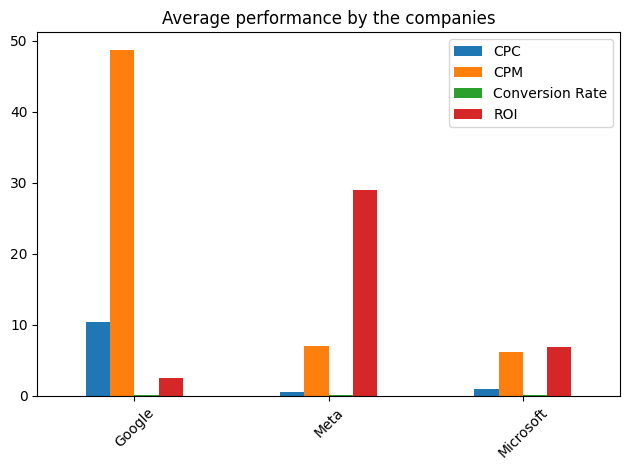

In [8]:
comparative_metrics.T.plot(kind='bar',title='Average performance by the companies',)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analyzing the customer journey data

In [9]:
# Analyze customer journey data
customer_journey_analysis = customer_journey.groupby(['User Id', 'Website Landing Time'])['Is Converted'].max().reset_index()
customer_journey_analysis['Conversion'] = customer_journey_analysis['Is Converted'].astype(int)

# Calculate average journey length and common conversion paths
avg_journey_length = customer_journey_analysis.groupby('User Id')['Website Landing Time'].count().mean()
print(f'Average customer journey length: {avg_journey_length:.2f}')

converted_journeys = customer_journey_analysis[customer_journey_analysis['Conversion'] == 1]['Website Landing Time'].value_counts().head(5)
print('Common conversion paths:')
print(converted_journeys)

Average customer journey length: 1.67
Common conversion paths:
Website Landing Time
2024-04-24 15:06:24    2
2024-01-30 13:50:22    2
2024-03-22 16:06:16    2
2024-01-24 20:18:10    2
2024-01-05 19:39:46    2
Name: count, dtype: int64


# Correlation analysis

Correlation Matrix:
             Impressions    Clicks      Cost  Conversions   Revenue
Impressions     1.000000  0.961567  0.866565     0.664896  0.609286
Clicks          0.961567  1.000000  0.944273     0.789516  0.741381
Cost            0.866565  0.944273  1.000000     0.862719  0.834327
Conversions     0.664896  0.789516  0.862719     1.000000  0.948139
Revenue         0.609286  0.741381  0.834327     0.948139  1.000000


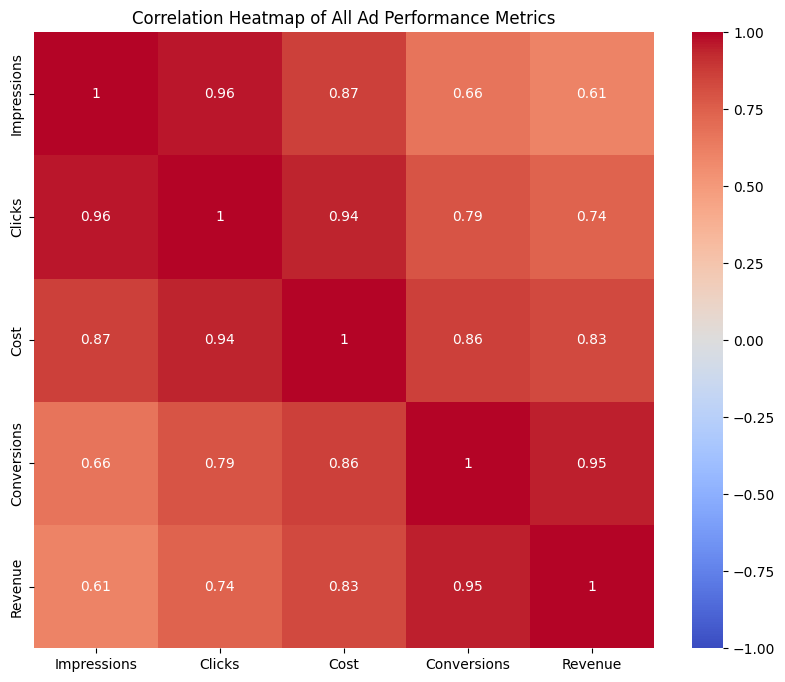

In [10]:
# Combine all ad data
all_ads = pd.concat([google_ads, meta_ads, microsoft_ads], keys=['Google', 'Meta', 'Microsoft'])
all_ads = all_ads.reset_index(level=0)
all_ads = all_ads.rename(columns={'level_0': 'Platform'})

# Calculate correlation using .corr()
correlation_matrix = all_ads[['Impressions', 'Clicks', 'Cost', 'Conversions', 'Revenue']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Visualize correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of All Ad Performance Metrics')
plt.show()

In [11]:
def safe_divide(a, b):
    return np.where(b != 0, a / b, 0)

# this will encounter the division by zero we are making it 0 if any of clicks/cost/impression is o or not present in the data

In [12]:
def safe_divide(numerator, denominator):
    return np.where(denominator != 0, numerator / denominator, 0)

platform_performance = all_ads.groupby('Platform').agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Cost': 'sum',
    'Conversions': 'sum',
    'Revenue': 'sum'
}).reset_index()

platform_performance['CPC'] = safe_divide(platform_performance['Cost'], platform_performance['Clicks'])
platform_performance['CVR'] = safe_divide(platform_performance['Conversions'], platform_performance['Clicks'])
platform_performance['ROI'] = safe_divide(platform_performance['Revenue'], platform_performance['Cost'])

print("Columns in DataFrame:", platform_performance.columns)

target_variable = platform_performance['Conversions']
if 'Conversions' in platform_performance.columns:
    # Calculate correlation of each metric with the target variable (Total Conversions)
    correlations = platform_performance[['ROI', 'CVR', 'CPC', 'Conversions']].corr()
    correlation_with_target = correlations['Conversions'].drop('Conversions')
    
    # Use absolute values of correlations to define coefficients
    coefficients = correlation_with_target.abs()
    
    # Normalize coefficients to sum up to 1
    coefficients = coefficients / coefficients.sum()
    
    # Calculate Efficiency Score with dynamic coefficients
    platform_performance['Efficiency Score'] = (
        platform_performance['ROI'] * coefficients.get('ROI', 0) +
        platform_performance['CVR'] * coefficients.get('CVR', 0) +
        (1 / platform_performance['CPC']) * coefficients.get('CPC', 0)
    )
platform_performance = platform_performance.sort_values('Efficiency Score', ascending=False)

print("Platform Performance:")
print(platform_performance[['Platform', 'Efficiency Score', 'ROI', 'CVR', 'CPC']])


Columns in DataFrame: Index(['Platform', 'Impressions', 'Clicks', 'Cost', 'Conversions', 'Revenue',
       'CPC', 'CVR', 'ROI'],
      dtype='object')
Platform Performance:
    Platform  Efficiency Score        ROI       CVR       CPC
1       Meta          8.652172  25.328298  0.060422  0.425427
0     Google          1.369580   3.667424  0.029241  1.787035
2  Microsoft          1.225014   2.629981  0.019590  1.144695


# Time Series Analysis 

In [13]:
#from statsmodels.tsa.statespace.sarimax import SARIMAX

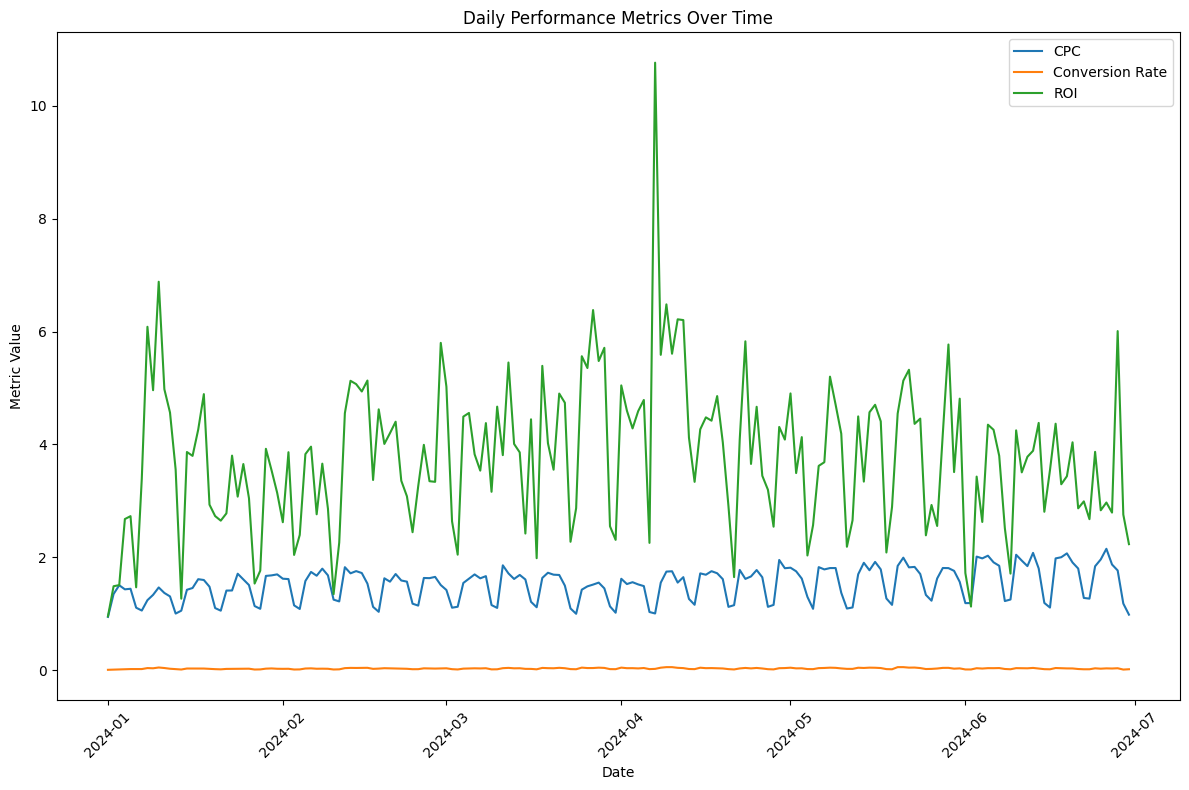

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.28339D+00    |proj g|=  4.20423D-02

At iterate    5    f=  4.25590D+00    |proj g|=  1.51799D-02

At iterate   10    f=  4.20180D+00    |proj g|=  1.98506D-02

At iterate   15    f=  4.20152D+00    |proj g|=  1.33020D-04

At iterate   20    f=  4.20152D+00    |proj g|=  2.86247D-04

At iterate   25    f=  4.20150D+00    |proj g|=  2.50666D-03

At iterate   30    f=  4.20140D+00    |proj g|=  7.20796D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

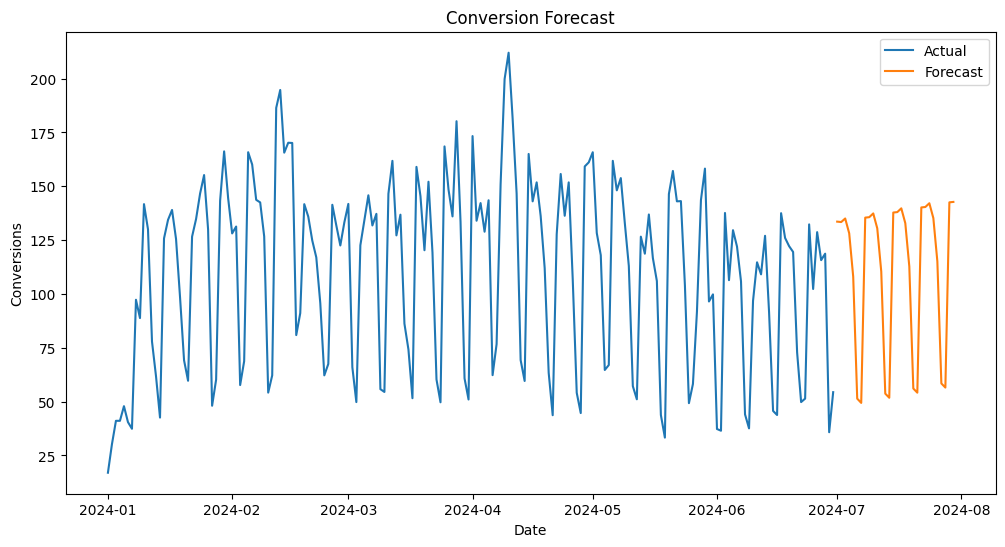

In [14]:
# Aggregate data by date
daily_performance = all_ads.groupby('Date').agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Cost': 'sum',
    'Conversions': 'sum',
    'Revenue': 'sum'
}).reset_index()

# Calculate daily metrics
# CVR is not Conversion Rate 
# CVR -> coversion per cost
# Conversion Rate -> coversion per clicks
daily_performance['CPC'] = safe_divide(daily_performance['Cost'] ,daily_performance['Clicks'])
daily_performance['CVR'] = safe_divide(daily_performance['Conversions'], daily_performance['Clicks'])
daily_performance['ROI'] = safe_divide(daily_performance['Revenue'] , daily_performance['Cost'])

# Plot time series
plt.figure(figsize=(12, 8))
plt.plot(daily_performance['Date'], daily_performance['CPC'], label='CPC')
plt.plot(daily_performance['Date'], daily_performance['CVR'], label='Conversion Rate')
plt.plot(daily_performance['Date'], daily_performance['ROI'], label='ROI')
plt.title('Daily Performance Metrics Over Time')
plt.xlabel('Date')
plt.ylabel('Metric Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# SARIMAX model for forecasting
model = SARIMAX(daily_performance['Conversions'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
results = model.fit()
forecast = results.forecast(steps=30)

plt.figure(figsize=(12, 6))
plt.plot(daily_performance['Date'], daily_performance['Conversions'], label='Actual')
plt.plot(pd.date_range(start=daily_performance['Date'].iloc[-1], periods=31)[1:], forecast, label='Forecast')
plt.title('Conversion Forecast')
plt.xlabel('Date')
plt.ylabel('Conversions')
plt.legend()
plt.show()

# Trend Analysis

In [15]:
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error

* <b>Feature Engineering</b>

In [16]:
all_ads['Day_of_Week'] = pd.to_datetime(all_ads['Date']).dt.dayofweek
all_ads['Month'] = pd.to_datetime(all_ads['Date']).dt.month
all_ads['Is_Weekend'] = all_ads['Day_of_Week'].isin([5, 6]).astype(int)
# Prepaing the data for modeling
X = all_ads[['Impressions', 'Clicks', 'Cost', 'Day_of_Week', 'Month', 'Is_Weekend']]
y = all_ads['Conversions']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# here we are using Random Forest as a predictive modeling
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)
print("Feature Importance:")
print(feature_importance)

# Predicting the  conversions

y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("prediction\n",y_pred,"\n")
print(f"\nMean Squared Error: {mse}")

Feature Importance:
       feature  importance
2         Cost    0.785868
1       Clicks    0.097709
0  Impressions    0.050429
3  Day_of_Week    0.030390
4        Month    0.027781
5   Is_Weekend    0.007823
prediction
 [3.5000e-01 3.8030e+01 8.0000e-02 2.5046e+01 1.7200e-01 6.3900e+00
 4.3040e+00 1.3080e+01 6.3700e+00 1.3218e+01 3.3463e+01 2.6360e+01
 3.3700e+00 0.0000e+00 2.4000e-02 2.0710e+01 4.0037e+01 5.2059e+01
 1.2350e+01 3.8348e+01 0.0000e+00 1.1233e+01 4.1407e+01 0.0000e+00
 6.2000e-01 0.0000e+00 6.0500e+00 0.0000e+00 4.4242e+01 8.9000e-01
 2.5710e+01 1.0000e-02 2.9200e-01 4.4848e+01 3.0306e+01 6.6400e+01
 4.4600e+00 2.3000e-01 3.0000e-02 2.0000e-02 0.0000e+00 1.5233e+01
 0.0000e+00 3.1801e+01 1.2600e+00 7.6100e+00 5.6000e-01 0.0000e+00
 5.6000e-02 0.0000e+00 1.2947e+01 0.0000e+00 9.7060e+00 3.1658e+01
 4.0500e+00 0.0000e+00 0.0000e+00 4.8000e-01 9.0000e-02 8.5270e+00
 7.8500e+00 4.9047e+01 4.1738e+01 6.0840e+00 3.7000e-01 5.7380e+00
 7.2000e-01 3.7000e-01 1.6000e-02 5.5400e+

In [17]:
rf_model.score(X,y)

0.96265135622799

In [18]:
# Channel Attribution (simplified Shapley value approach)
def shapley_value(model, X):
    import shap
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)
    return pd.DataFrame(shap_values, columns=X.columns).abs().mean()

channel_attribution = shapley_value(rf_model, X)
print("Channel Attribution:")
print(channel_attribution)

Channel Attribution:
Impressions     1.426866
Clicks          4.942269
Cost           10.544711
Day_of_Week     1.505774
Month           0.831114
Is_Weekend      0.512885
dtype: float64


In [19]:
#from sklearn.cluster import KMeans

In [20]:
journey_features = all_ads[['Impressions', 'Clicks', 'Cost', 'Conversions']]
kmeans = KMeans(n_clusters=4, random_state=42)
all_ads['Journey_Stage'] = kmeans.fit_predict(journey_features)

stage_effectiveness = all_ads.groupby('Journey_Stage').agg({
    'Conversions': 'mean',
    'ROI': 'mean'
}).reset_index()

print("Journey Stage Effectiveness:\n")
print(stage_effectiveness)

Journey Stage Effectiveness:

   Journey_Stage  Conversions       ROI
0              0     7.892561  9.389724
1              1    40.271171  3.049124
2              2    57.625424  2.919285
3              3    10.448106  3.302824


# Budget Allocation


Recommended Budget Allocation:

    Platform  Recommended Allocation in $
1       Meta                127702.433661
0     Google                 37048.567744
2  Microsoft                 35248.998595 



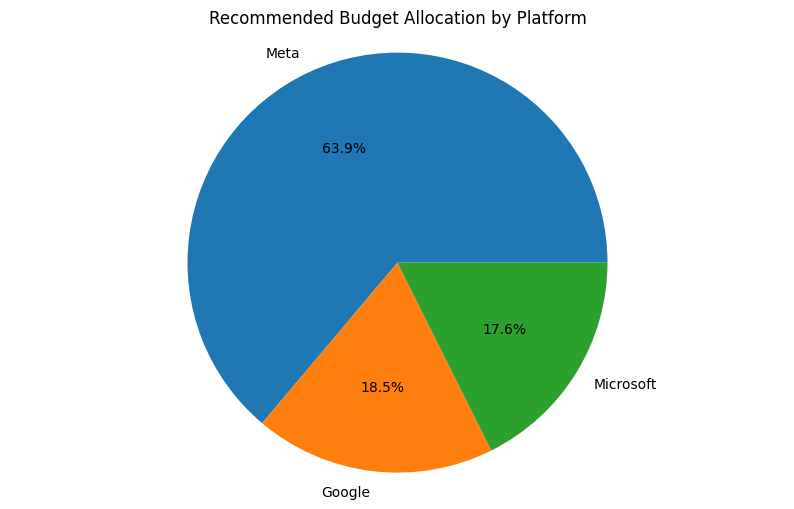

In [23]:
total_budget = 200000  # Total budget
min_allocation = 0.1 * total_budget  # Minimum 10% allocation per platform
remaining_budget = total_budget - (min_allocation * len(platform_performance))
total_efficiency = platform_performance['Efficiency Score'].sum()

platform_performance['Recommended Allocation in $'] = min_allocation + (
    (platform_performance['Efficiency Score'] / total_efficiency) * remaining_budget
)
# This is going to encounter the constraint given of allocating them minimum amount

print("\nRecommended Budget Allocation:\n")
print(platform_performance[['Platform', 'Recommended Allocation in $']],"\n")

# Visualize budget allocation
plt.figure(figsize=(10, 6))
plt.pie(platform_performance['Recommended Allocation'], 
        labels=platform_performance['Platform'], 
        autopct='%1.1f%%')
plt.title('Recommended Budget Allocation by Platform')
plt.axis('equal')
plt.show()